In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

In [19]:
chi_vac = pd.read_csv('https://data.cityofchicago.org/resource/2vhs-cf6b.csv')
chi_vac['date'] = pd.to_datetime(chi_vac['date']).dt.normalize() #to remove time values from showing
chi_vac.set_index('date',inplace=True)
chi_vac.head(15)

,total_doses_daily,total_doses_cumulative,_1st_dose_daily,_1st_dose_cumulative,_1st_dose_percent_population,vaccine_series_completed_daily,vaccine_series_completed_cumulative,vaccine_series_completed_percent_population,total_doses_daily_age_0_17,total_doses_daily_age_18_29,...,vaccine_series_completed_daily_age_unknown_age,vaccine_series_completed_daily_female,vaccine_series_completed_daily_male,vaccine_series_completed_daily_unknown_gender,vaccine_series_completed_daily_latinx,vaccine_series_completed_daily_asian_non_latinx,vaccine_series_completed_daily_black_non_latinx,vaccine_series_completed_daily_white_non_latinx,vaccine_series_completed_daily_other_race_non_latinx,vaccine_series_completed_daily_unknown_race_ethnicity
date,,,,,,,,,,,,,,,,,,,,,
2021-03-27,16574,1068765,10959,718410,0.267,6073,367772,0.137,36,3128,...,0,3405,2649,19,2434,434,1376,1453,133,243
2021-03-26,28856,1052191,18144,707451,0.263,11431,361699,0.134,81,4899,...,0,6495,4905,31,3094,743,2639,4266,268,421
2021-03-25,27056,1023335,18733,689307,0.256,9033,350268,0.130,70,4551,...,0,5038,3970,25,2650,448,2129,3249,230,327
2021-03-24,23815,996279,17894,670574,0.249,6693,341235,0.127,67,3808,...,0,3651,3037,5,2116,379,1506,2301,122,269
2021-03-23,23451,972464,18033,652680,0.242,6260,334542,0.124,55,3516,...,0,3331,2906,23,2116,391,1338,1958,162,295
2021-03-22,20661,949013,16021,634647,0.236,5205,328282,0.122,45,3250,...,0,2750,2408,47,1587,276,1410,1555,109,268
2021-03-21,11675,928352,8826,618626,0.230,3219,323077,0.120,27,1962,...,0,1848,1362,9,868,122,602,1133,89,405
2021-03-20,17668,916677,12323,609800,0.226,7069,319858,0.119,41,2722,...,0,3878,3180,11,2836,493,910,2175,162,493
2021-03-19,24444,899009,18205,597477,0.222,7197,312789,0.116,67,3723,...,0,3936,3222,39,2116,424,1524,2707,139,287


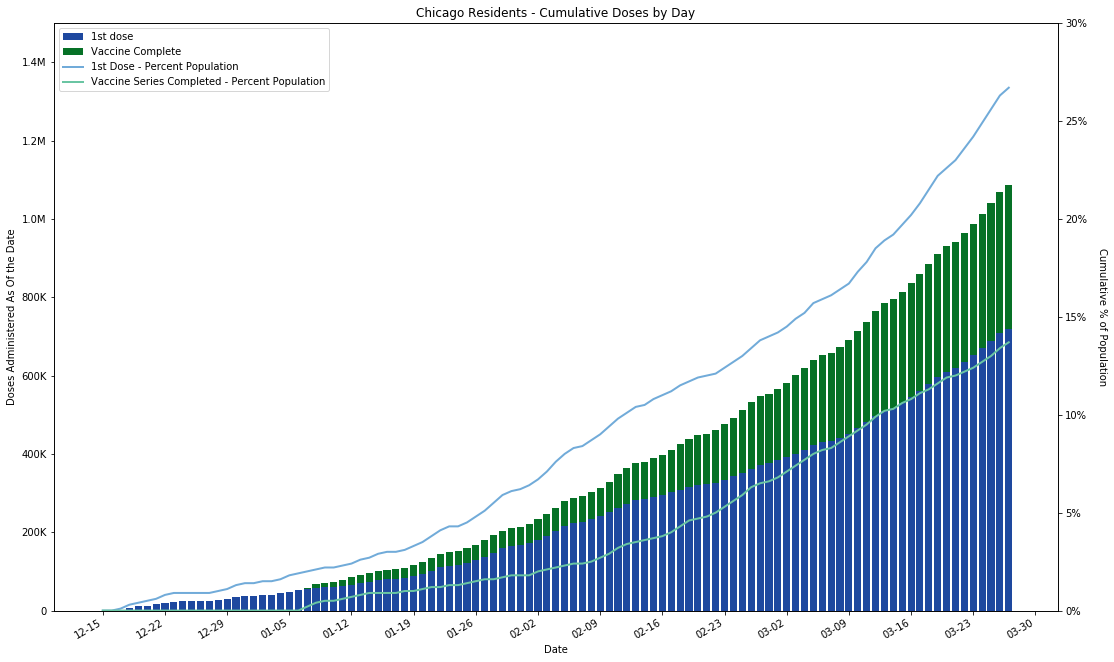

In [20]:
# Recreating graph of City of Chicago Data Portal
# https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Vaccinations-Chicago-Residents-Cumu/rna5-2pgy

fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(chi_vac.index, chi_vac['_1st_dose_cumulative'], color='#1e489f', label='1st dose')
ax.bar(chi_vac.index, chi_vac['vaccine_series_completed_cumulative'], color='#067126', bottom=chi_vac['_1st_dose_cumulative'], label='Vaccine Complete')

# Adds K and M abbreviation to the y axis
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.fK' % (x * 1e-3) if x >= 1e3 else '%1.f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)

axes2 = plt.twinx()
axes2.plot(chi_vac.index, chi_vac['_1st_dose_percent_population'], color='#71abd9', label='1st Dose - Percent Population', linewidth=2)
axes2.plot(chi_vac.index, chi_vac['vaccine_series_completed_percent_population'], color='#6ac5a3', label='Vaccine Series Completed - Percent Population', linewidth=2)
axes2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1, decimals=0))

#Shows the Month and Day on x axis on every Tuesday
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# y axis limits need to be set so 0 starts at the bottom for both plots
ax.set_ylim(0,1500000,100000)
axes2.set_ylim(0,0.30,0.05)

ax.set_xlabel('Date')
ax.set_ylabel('Doses Administered As Of the Date')
axes2.set_ylabel('Cumulative % of Population', rotation=270, labelpad=20)
ax.set_title('Chicago Residents - Cumulative Doses by Day')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
fig.autofmt_xdate()

plt.show()

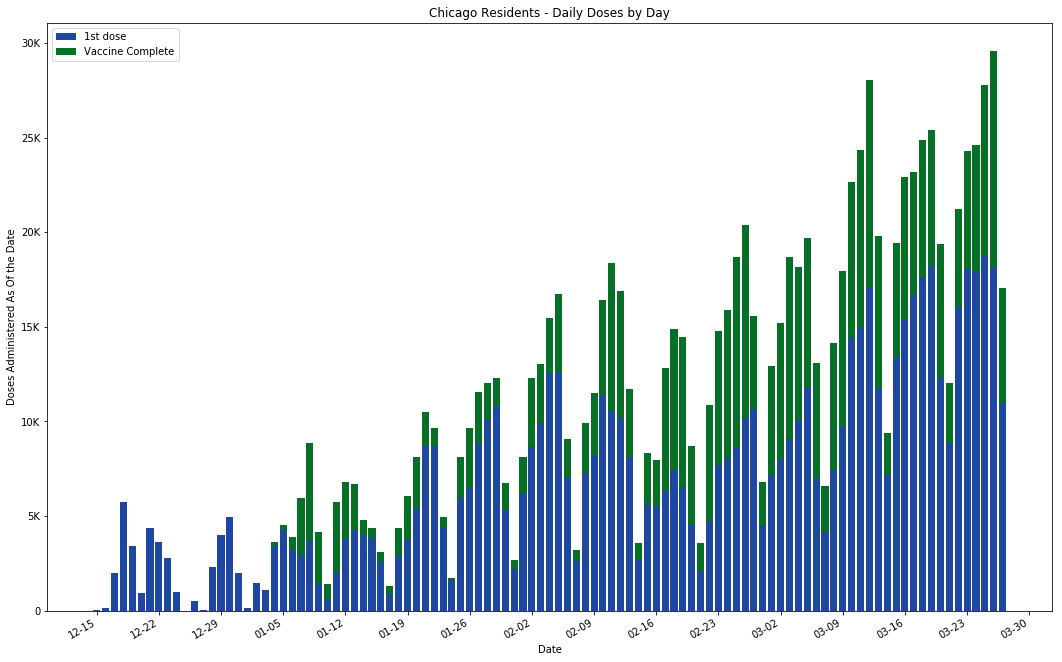

In [4]:
# Graph of daily doses administered by type

fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(chi_vac.index, chi_vac['_1st_dose_daily'], color='#1e489f', label='1st dose')
ax.bar(chi_vac.index, chi_vac['vaccine_series_completed_daily'], color='#067126', bottom=chi_vac['_1st_dose_daily'], label='Vaccine Complete')

# Adds K and M abbreviation to the y axis
mkfunc = lambda x, pos: '%1.fM' % (x * 1e-6) if x >= 1e6 else '%1.fK' % (x * 1e-3) if x >= 1e3 else '%1.f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)


#Shows the Month and Day on x axis on every Tuesday
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Doses Administered As Of the Date')
ax.set_title('Chicago Residents - Daily Doses by Day')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
fig.autofmt_xdate()

plt.show()